In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing face mask dataset

In [13]:
#Api to fecth the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:07<00:00, 24.0MB/s]
100% 163M/163M [00:08<00:00, 21.3MB/s]


In [14]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [15]:
!ls  #to list all the directories

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [16]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split 

In [17]:
with_mask_files = os.listdir('/content/data/with_mask')
print(len(with_mask_files))
print(with_mask_files[0:5])
print(with_mask_files[-5:])

3725
['with_mask_193.jpg', 'with_mask_754.jpg', 'with_mask_486.jpg', 'with_mask_2756.jpg', 'with_mask_1328.jpg']
['with_mask_2590.jpg', 'with_mask_1545.jpg', 'with_mask_3357.jpg', 'with_mask_1143.jpg', 'with_mask_2196.jpg']


In [18]:
without_mask_files = os.listdir('/content/data/without_mask')
print(len(without_mask_files))
print(without_mask_files[0:5])
print(without_mask_files[-5:])

3828
['without_mask_1871.jpg', 'without_mask_1012.jpg', 'without_mask_2600.jpg', 'without_mask_1623.jpg', 'without_mask_1116.jpg']
['without_mask_2925.jpg', 'without_mask_3559.jpg', 'without_mask_38.jpg', 'without_mask_1333.jpg', 'without_mask_1137.jpg']


Creating labels for the two class of Images

with mask - 1

without mask - 0

In [19]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels =  [0]*3828

In [20]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [21]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


**Displaying the Images**

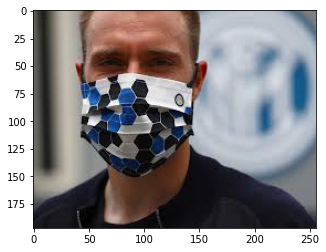

In [25]:
#display with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2756.jpg')    ##reading the image
imgplot = plt.imshow(img)
plt.show()

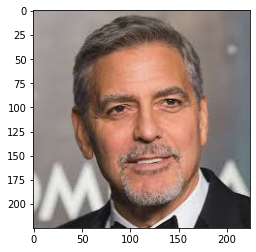

In [30]:
#display with out mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3559.jpg')    ##reading the image
imgplot = plt.imshow(img)
plt.show()

**Image processing**

1.Resize the images

2.Convert the images to numpy arrays

In [31]:
##convert the images to numpy arrays

with_mask_path = "/content/data/with_mask/"

data = []

##for image with mask

for img_file in with_mask_files:
  image  = Image.open(with_mask_path + img_file)       #reading the images
  image = image.resize((128,128))    ##resizing the images
  image = image.convert('RGB')    ## converting the image to rgb channel
  image = np.array(image)    ## making a numpy array of the image
  data.append(image)  ## adding the image to data list

without_mask_path = "/content/data/without_mask/"

###for without mask images
for img_file in without_mask_files:
  image  = Image.open(without_mask_path + img_file)       #reading the images
  image = image.resize((128,128))    ##resizing the images
  image = image.convert('RGB')    ## converting the image to rgb channel
  image = np.array(image)    ## making a numpy array of the image
  data.append(image)  ## adding the image to data list

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
len(data)

7553

In [36]:
data[0]

array([[[166, 115,  98],
        [159, 110,  95],
        [156, 111,  99],
        ...,
        [142, 100,  85],
        [145, 105,  90],
        [150, 113,  97]],

       [[164, 113,  97],
        [157, 109,  93],
        [153, 107,  96],
        ...,
        [138,  95,  80],
        [144, 103,  88],
        [147, 108,  93]],

       [[160, 111,  96],
        [155, 109,  95],
        [150, 108,  95],
        ...,
        [138,  95,  80],
        [147, 106,  92],
        [140, 102,  87]],

       ...,

       [[192, 145, 134],
        [193, 148, 137],
        [194, 149, 139],
        ...,
        [100,  74,  77],
        [102,  76,  79],
        [101,  75,  76]],

       [[190, 146, 131],
        [192, 149, 134],
        [195, 151, 137],
        ...,
        [ 95,  70,  73],
        [101,  75,  77],
        [102,  76,  77]],

       [[188, 145, 128],
        [191, 148, 132],
        [193, 148, 134],
        ...,
        [ 95,  70,  73],
        [ 94,  67,  70],
        [ 96,  70,  71]]

In [37]:
data[0].shape

(128, 128, 3)

In [38]:
##converting the image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [40]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [42]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [43]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=5)

In [44]:
print(X_train.shape)
print(X_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [45]:
###scaling the data with max value of pixel and all the pixel will fall in range of 0 to 1
X_train_scaled  = X_train/255

X_test_scaled = X_test/255   

In [46]:
X_train_scaled[0]

array([[[0.34117647, 0.36862745, 0.34509804],
        [0.37254902, 0.4       , 0.36470588],
        [0.44313725, 0.46666667, 0.41960784],
        ...,
        [0.88627451, 0.86666667, 0.63529412],
        [0.91372549, 0.90196078, 0.64313725],
        [0.90980392, 0.89019608, 0.63137255]],

       [[0.52156863, 0.56078431, 0.51764706],
        [0.4745098 , 0.50196078, 0.45882353],
        [0.44705882, 0.46666667, 0.41960784],
        ...,
        [0.89803922, 0.87058824, 0.63921569],
        [0.90196078, 0.87058824, 0.62352941],
        [0.90196078, 0.8745098 , 0.61960784]],

       [[0.60784314, 0.65098039, 0.59215686],
        [0.63529412, 0.67058824, 0.61568627],
        [0.56078431, 0.58039216, 0.5372549 ],
        ...,
        [0.89019608, 0.84705882, 0.61176471],
        [0.8627451 , 0.81568627, 0.57254902],
        [0.94117647, 0.89019608, 0.63529412]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building Convolutional Neural Network** (CNN)



In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
num_of_clasess = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32 ,kernel_size=(3,3) , activation = 'relu' , input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64 ,kernel_size=(3,3) , activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_clasess,activation='sigmoid'))

In [49]:
##compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [50]:
history = model.fit(X_train_scaled , Y_train , validation_split=0.1 , epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 22ms/step - loss: 0.4526 - acc: 0.8071 - val_loss: 0.3415 - val_acc: 0.8545
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2988 - acc: 0.8874 - val_loss: 0.2404 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2550 - acc: 0.8952 - val_loss: 0.2284 - val_acc: 0.8975
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2193 - acc: 0.9172 - val_loss: 0.2070 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1861 - acc: 0.9292 - val_loss: 0.2079 - val_acc: 0.9074


Model Evaluation

In [51]:
loss , accuracy = model.evaluate(X_test_scaled ,Y_test)
print('Test Accuracy = ' , accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2271 - acc: 0.9067
Test Accuracy =  0.9066843390464783


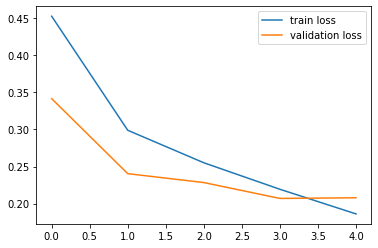

In [53]:
##ploting the loss
h = history
plt.plot(h.history['loss'] , label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

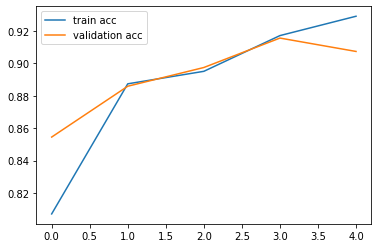

In [54]:
plt.plot(h.history['acc'] , label='train acc')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

**Predictive system**

Path of the image to be predicted: /content/test.jfif


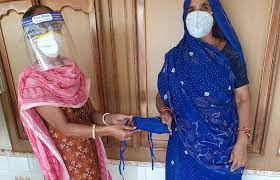

1/1 [==============================] - 0s 34ms/step
[[0.39071888 0.61201113]]
1
The person is wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image , (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled , [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person is wearing a mask')
else:
  print('The person is not wearing the mask')

In [57]:
import pickle
filename = 'maskclassification.pkl'
pickle.dump(model , open(filename , 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Mo